# Decision Tree ( 결정 트리 )
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 Tree기반의 분류 규칙 만듬
- if/else 를 자동으로 찾아내 예측을 위한 규칙을 만들어 가장 효율적인 분류가 될것인지 만듬
- data set마다 feature가 있고 feature가 결합해 규칙 조건을 만듬 
- 많은 규칙이 있다는 것은 분류를 결정하는 방식이 복잡해짐을 의미 
    - 과적합 유발
- 트리의 깊이가 깊어질수록 결정트리의 예측 성능이 저하될 가능성이 높음


## ✔ 가능한 한 적은 결정노드로 높은 예측 정확도 가지려면?
- 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정노드의 규칙이 정해져야함 
- 최대한 균일한 데이터 셋을 구성할 수 있도록 Tree를 분할하는 것이 중요

## ✔ Decision Tree의 data분할 기준 
### (1) 정보 이득 (Information Gain)
```
정보 이득 지수 = 1- 엔트로피 지수 
```
- Decision Tree는 정보이득 지수로 분할 기준 설정
#### Entropy
- 데이터 집합의 혼잡도 의미
- 서로 다른 값이 섞여있으면 엔트로피가 높음
- 같은 값이 섞여있으면 엔트로피 낮음

### (2) 지니 계수
- 불평등 지수 의미
- 0이 가장 평등 1로 갈수록 불평등
- 머신러닝에 적용 시 지니계수가 낮을수록 데이터 균일도가 높은 것으로 해석
    - 지니계수가 낮은 속성을 기준으로 분할 

## ✔ Decision Tree의 특징
- 정보의 균일도만 고려하면 된다
    - 각 feature의 scaling, 정규화 같은 전처리 작업 필요하지 X
- 과적합으로 정확도가 떨어짐
    - tree의 크기를 사전에 제한해서 성능 튜닝
    

## ✔ Decision Tree의 Parameter 
- min_samples_split 
    - node를 분할하기 위한 최소한의 샘플 데이터 수 의미
    - 과적합 제어 용도
- min_samples_leaf
    - leaf node가 되기 위한 최소한의 sample 데이터의 수 
    - 과적합 제어 용도
    - 비대칭적인 데이터의 경우 특정 class의 data가 극도로 작을 수 있으므로 작게 설정해야함 
- max_features
    - 최적 분할을 위해 고려할 최대 feature 갯수
    - dafault의 경우 모든 feature이용해 분할
- max_depth
    - tree의 최대 깊이 규정
    - default의 경우 완벽하게 class결정값이 될때까지 깊이를 계속 키우며 분할 
    - 과적합 제어 용도

## ✔ Practice

In [1]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

In [3]:
# Loading iris data & Split train/test set
iris_data=load_iris()
X_train,X_test, y_train,y_test= train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

In [4]:
# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [5]:
# dot file로 export
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

In [6]:
import pydot
(graph,)=pydot.graph_from_dot_file('tree.dot', encoding='utf8')

In [7]:
# dot file -> png
graph.write_png('tree.png')

## Result
![tree](tree.png)

### 결과 Meaning
- petal_length<2.45
    - 자식 node를 만들기 위한 규칙 조건
    - 조건이 없는 경우 leaf node 의미
- gini
    - 다음의 value로 주어진 data분포에서의 지니계수 의미
- samples
    - 현 규칙에 해당하는 데이터 건수
- value
    - class값 기반의 data 건수
    - setosa, versi, virhginica품종의 갯수를 차례로 가리킴

- 여기서 max_depth를 설정하면 더 간단한 결정트리가 됌
    

## Feature 별 중요도 Mapping 

In [8]:
import seaborn as sns
import numpy as np 
%matplotlib inline 

In [9]:
# feature importance 추출
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

<AxesSubplot:>

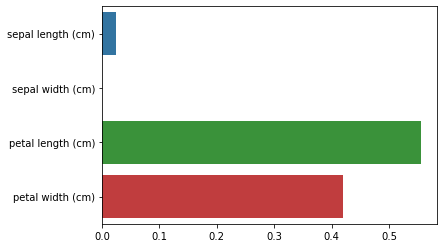

In [10]:
# feature importance를 column 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### result
- petal_length가 가장 feature importance가 높음
